In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import sklearn.preprocessing as preproc
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
from pract2_utils import *

In [2]:
RESULTS='results/accidentes/'
DATA='data/accidentes_2013.csv'

def readData(results_file):
    return pd.read_csv(results_file,header=0,engine='python')

In [3]:
dataTot=readData(DATA)
dataTot

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
0,8,14.0,3,Bizkaia,País Vasco,NO_ES_ISLA,3,3,0,0.054104,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,LLUVIA FUERTE,FACTORES ATMOSFÉRICOS,OTRA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
1,6,18.0,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,SEMÁFORO,MOJADA,PLENO DÍA,LLOVIZNANDO,OTRA_CAUSA,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA
2,11,17.0,2,Tarragona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,SEÑAL DE STOP,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),?,?
3,1,9.0,3,Lleida,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,?,MOJADA,PLENO DÍA,LLOVIZNANDO,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Múltiple o en...,?,NINGUNA MEDIDA
4,11,22.0,7,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,?,MOJADA,NOCHE: ILUMINACIÓN SUFICIENTE,LLUVIA FUERTE,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89514,6,19.0,5,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.018035,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Atropello a peatón aislado o en grupo,FLUIDA,NINGUNA MEDIDA
89515,4,17.0,4,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.000000,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Lateral),FLUIDA,NINGUNA MEDIDA
89516,1,23.0,5,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.018035,...,SEÑAL DE CEDA EL PASO,SECA Y LIMPIA,NOCHE: ILUMINACIÓN SUFICIENTE,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Frontolateral),FLUIDA,NINGUNA MEDIDA
89517,2,15.0,3,Melilla,Ceuta y Melilla,NO_ES_ISLA,2,2,0,0.000000,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA


In [4]:
dataTot.columns

Index(['MES', 'HORA', 'DIASEMANA', 'PROVINCIA', 'COMUNIDAD_AUTONOMA', 'ISLA',
       'TOT_VICTIMAS', 'TOT_VICTIMAS30D', 'TOT_MUERTOS', 'TOT_MUERTOS30D',
       'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_GRAVES30D', 'TOT_HERIDOS_LEVES',
       'TOT_HERIDOS_LEVES30D', 'TOT_VEHICULOS_IMPLICADOS', 'ZONA',
       'ZONA_AGRUPADA', 'RED_CARRETERA', 'TIPO_VIA', 'TRAZADO_NO_INTERSEC',
       'TIPO_INTERSEC', 'ACOND_CALZADA', 'PRIORIDAD', 'SUPERFICIE_CALZADA',
       'LUMINOSIDAD', 'FACTORES_ATMOSFERICOS', 'VISIBILIDAD_RESTRINGIDA',
       'OTRA_CIRCUNSTANCIA', 'ACERAS', 'TIPO_ACCIDENTE',
       'DENSIDAD_CIRCULACION', 'MEDIDAS_ESPECIALES'],
      dtype='object')

In [5]:
Counter(dataTot.HORA) # Hay que redondear los valores

Counter({14.0: 3599,
         18.0: 3292,
         17.0: 3005,
         9.0: 2845,
         22.0: 1767,
         19.0: 3319,
         12.0: 3386,
         16.0: 2712,
         20.0: 3073,
         13.0: 3586,
         23.0: 1291,
         4.0: 333,
         15.0: 3043,
         10.0: 2542,
         7.0: 1079,
         6.0: 697,
         8.0: 2271,
         21.0: 2433,
         2.0: 411,
         11.0: 2824,
         3.0: 323,
         5.0: 409,
         0.0: 464,
         1.0: 512,
         20.416666666666668: 98,
         15.166666666666664: 192,
         13.5: 539,
         20.25: 302,
         10.5: 437,
         22.75: 143,
         20.916666666666668: 58,
         14.25: 386,
         21.33333333333333: 176,
         20.58333333333333: 94,
         8.166666666666666: 145,
         19.116666666666667: 4,
         17.75: 273,
         15.5: 490,
         7.75: 189,
         20.75: 265,
         23.75: 83,
         19.25: 330,
         20.83333333333333: 191,
         18.25: 273,
   

In [6]:
data=dataTot.copy()
data.HORA=pd.Series(map(lambda x: round(x)%24, data.HORA))
data.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
0,8,14,3,Bizkaia,País Vasco,NO_ES_ISLA,3,3,0,0.054104,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,LLUVIA FUERTE,FACTORES ATMOSFÉRICOS,OTRA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
1,6,18,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,SEMÁFORO,MOJADA,PLENO DÍA,LLOVIZNANDO,OTRA_CAUSA,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA
2,11,17,2,Tarragona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,SEÑAL DE STOP,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),?,?
3,1,9,3,Lleida,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,?,MOJADA,PLENO DÍA,LLOVIZNANDO,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Múltiple o en...,?,NINGUNA MEDIDA
4,11,22,7,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,?,MOJADA,NOCHE: ILUMINACIÓN SUFICIENTE,LLUVIA FUERTE,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),?,?


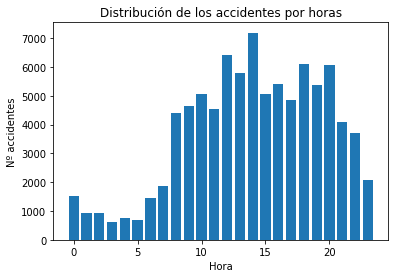

In [7]:
n_accidentes=list(data.groupby('HORA').count().MES)
horas=list(range(24))

plt.bar(horas,n_accidentes)
plt.title('Distribución de los accidentes por horas')
plt.xlabel('Hora')
plt.ylabel('Nº accidentes')
plt.show()

In [8]:
# Atributos numéricos que reflejan la gravedad del accidente, sobre los que haré clustering
atributos=['TOT_VICTIMAS','TOT_MUERTOS','TOT_HERIDOS_GRAVES','TOT_HERIDOS_LEVES','TOT_VEHICULOS_IMPLICADOS']

## Caso de uso 2 (segunda parte): Estudio de los accidentes en horas puntas

In [9]:
data=dataTot[(dataTot.HORA==14) | (dataTot.HORA==20)]
data=data[atributos]
data

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS
0,3,0,3,0,2
10,1,0,0,1,1
24,1,0,1,0,1
29,1,0,0,1,1
34,1,0,0,1,1
...,...,...,...,...,...
89490,1,0,0,1,1
89494,1,0,0,1,2
89495,3,0,0,3,2
89499,1,0,1,0,1


In [10]:
for a in atributos: # El accidente con 52 víctimas distorsiona las escalas
    print(a)
    print(Counter(data[a]))

TOT_VICTIMAS
Counter({1: 5027, 2: 1114, 3: 316, 4: 122, 5: 50, 6: 23, 7: 10, 8: 4, 10: 2, 9: 2, 52: 1, 11: 1})
TOT_MUERTOS
Counter({0: 6629, 1: 39, 2: 4})
TOT_HERIDOS_GRAVES
Counter({0: 6131, 1: 495, 2: 36, 3: 8, 5: 1, 4: 1})
TOT_HERIDOS_LEVES
Counter({1: 4700, 2: 1028, 0: 450, 3: 296, 4: 113, 5: 45, 6: 21, 7: 11, 9: 3, 8: 2, 47: 1, 10: 1, 11: 1})
TOT_VEHICULOS_IMPLICADOS
Counter({2: 3791, 1: 2344, 3: 418, 4: 82, 5: 25, 6: 7, 7: 4, 8: 1})


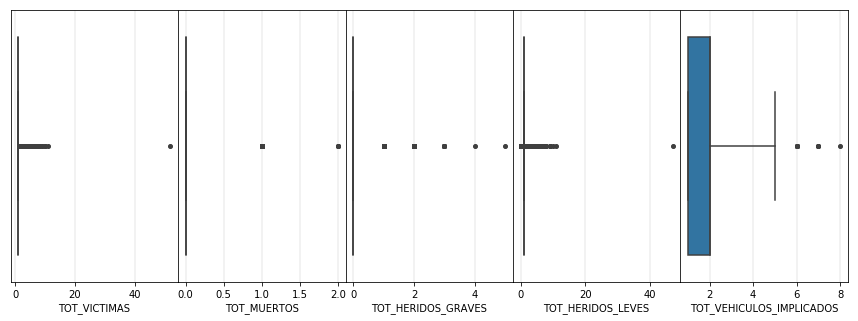

In [11]:
# Box Plot
n_var = len(atributos)
fig, axes = plt.subplots(1, n_var, sharey=True, figsize=(15,5))
fig.subplots_adjust(wspace=0, hspace=0)

colors = sns.color_palette(palette=None, n_colors=1, desat=None)

rango = []
for j in range(n_var):
    d=data[atributos[j]]
    rango.append([d.min(), d.max()])

for i in range(1):
    dat_filt = data
    for j in range(n_var):
        ax  = sns.boxplot(x=dat_filt[atributos[j]],
                         color=colors[i],
                         flierprops={
                             'marker': 'o',
                             'markersize': 4
                         },
                         ax=axes[j], whis=3,showfliers=True)

        if (i == 0):
            axes[j].set_xlabel(atributos[j])
        else:
            axes[j].set_xlabel("")

        if (j == 0):
            axes[j].set_ylabel("")
        else:
            axes[j].set_ylabel("")

        axes[j].set_yticks([])
        axes[j].grid(axis='x',
                        linestyle='-',
                        linewidth='0.2',
                        color='gray')
        axes[j].grid(axis='y', b=False)

        ax.set_xlim(rango[j][0] - 0.05 * (rango[j][1] - rango[j][0]),
                    rango[j][1] + 0.05 * (rango[j][1] - rango[j][0]))

In [12]:
# Elimino el outlier

data = data[data.TOT_VICTIMAS <=20]
data

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS
0,3,0,3,0,2
10,1,0,0,1,1
24,1,0,1,0,1
29,1,0,0,1,1
34,1,0,0,1,1
...,...,...,...,...,...
89490,1,0,0,1,1
89494,1,0,0,1,2
89495,3,0,0,3,2
89499,1,0,1,0,1


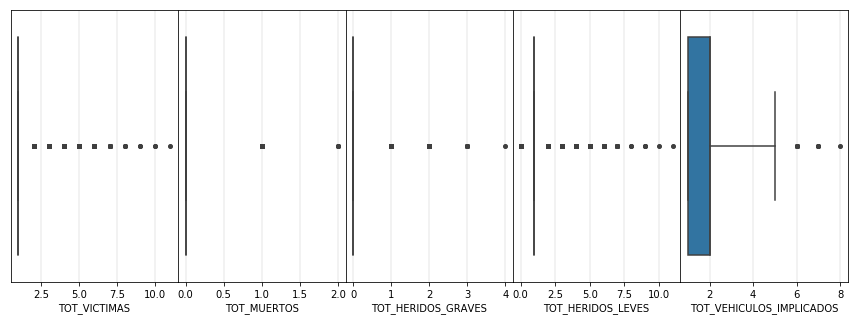

In [13]:
# Box Plot
n_var = len(atributos)
fig, axes = plt.subplots(1, n_var, sharey=True, figsize=(15,5))
fig.subplots_adjust(wspace=0, hspace=0)

colors = sns.color_palette(palette=None, n_colors=1, desat=None)

rango = []
for j in range(n_var):
    d=data[atributos[j]]
    rango.append([d.min(), d.max()])

for i in range(1):
    dat_filt = data
    for j in range(n_var):
        ax  = sns.boxplot(x=dat_filt[atributos[j]],
                         color=colors[i],
                         flierprops={
                             'marker': 'o',
                             'markersize': 4
                         },
                         ax=axes[j], whis=3,showfliers=True)

        if (i == 0):
            axes[j].set_xlabel(atributos[j])
        else:
            axes[j].set_xlabel("")

        if (j == 0):
            axes[j].set_ylabel("")
        else:
            axes[j].set_ylabel("")

        axes[j].set_yticks([])
        axes[j].grid(axis='x',
                        linestyle='-',
                        linewidth='0.2',
                        color='gray')
        axes[j].grid(axis='y', b=False)

        ax.set_xlim(rango[j][0] - 0.05 * (rango[j][1] - rango[j][0]),
                    rango[j][1] + 0.05 * (rango[j][1] - rango[j][0]))

In [14]:
# Normalizar los datos
normalizer=preproc.MinMaxScaler()
data_norm=normalizer.fit_transform(data)
data_norm

array([[0.2       , 0.        , 0.75      , 0.        , 0.14285714],
       [0.        , 0.        , 0.        , 0.09090909, 0.        ],
       [0.        , 0.        , 0.25      , 0.        , 0.        ],
       ...,
       [0.2       , 0.        , 0.        , 0.27272727, 0.14285714],
       [0.        , 0.        , 0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.09090909, 0.14285714]])

### K-Means

In [15]:
# Elección de un número adecuado de Clústers atendiendo a las métricas
K=list(range(2,10))
silhouette=[]
calinski=[]
for k in K:
    results = KMeans(n_clusters=k, random_state=0).fit(data_norm)
    sil, cal = measures_silhoutte_calinski(data_norm, results.labels_)
    silhouette.append(sil)
    calinski.append(cal)

In [16]:
print(silhouette)
print(calinski)

[0.6135688651849406, 0.6096733003502591, 0.6434532222153423, 0.7095232928793171, 0.7258859657816682, 0.7731325309485443, 0.8049770701878642, 0.8666820963168206]
[2696.33872606248, 3042.1823651937166, 3856.1727997768285, 3842.0192214888425, 4015.9019747979114, 4439.0939704885095, 4621.84482859672, 4772.895538641684]


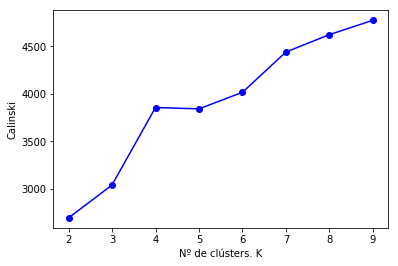

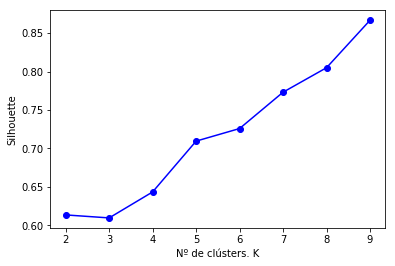

In [17]:
plt.plot(K,calinski, 'bo-')
plt.xlabel('Nº de clústers. K')
plt.ylabel('Calinski')
plt.show()
plt.plot(K,silhouette,'bo-')
plt.ylabel('Silhouette')
plt.xlabel('Nº de clústers. K')
plt.show()

Nos quedaremos con K=4. Introducir más clústers no gana tanto score y hace la segmentación difícil de interpretar.

In [18]:
K=4
results = KMeans(n_clusters=K, random_state=0).fit(data_norm)
labels=results.labels_
centroids=results.cluster_centers_

Análisis.

In [19]:
Counter(labels)

Counter({0: 3629, 1: 497, 2: 2020, 3: 525})

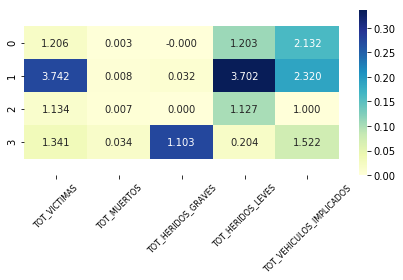

In [20]:
visualize_centroids(centroids, np.array(data), atributos, denormCentroids=True)

/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


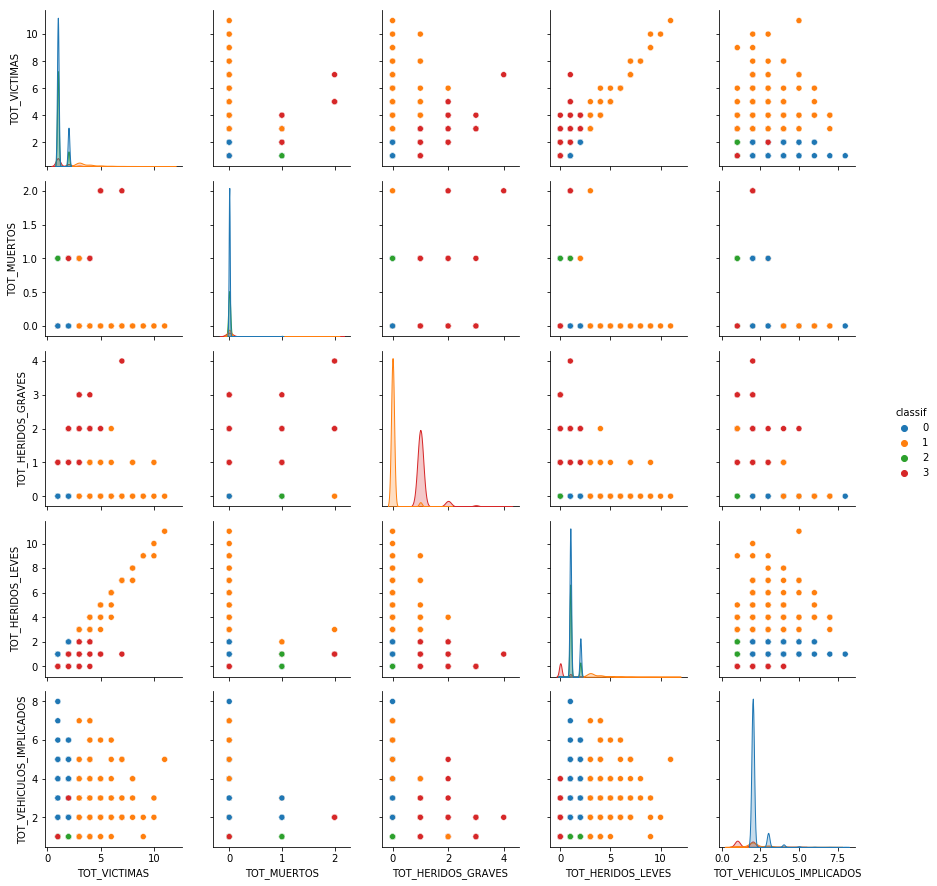

In [21]:
pairplot(data,atributos,labels)

In [22]:
dataC=data.copy()
dataC['cluster']=labels
dataC

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,cluster
0,3,0,3,0,2,3
10,1,0,0,1,1,2
24,1,0,1,0,1,3
29,1,0,0,1,1,2
34,1,0,0,1,1,2
...,...,...,...,...,...,...
89490,1,0,0,1,1,2
89494,1,0,0,1,2,0
89495,3,0,0,3,2,1
89499,1,0,1,0,1,3


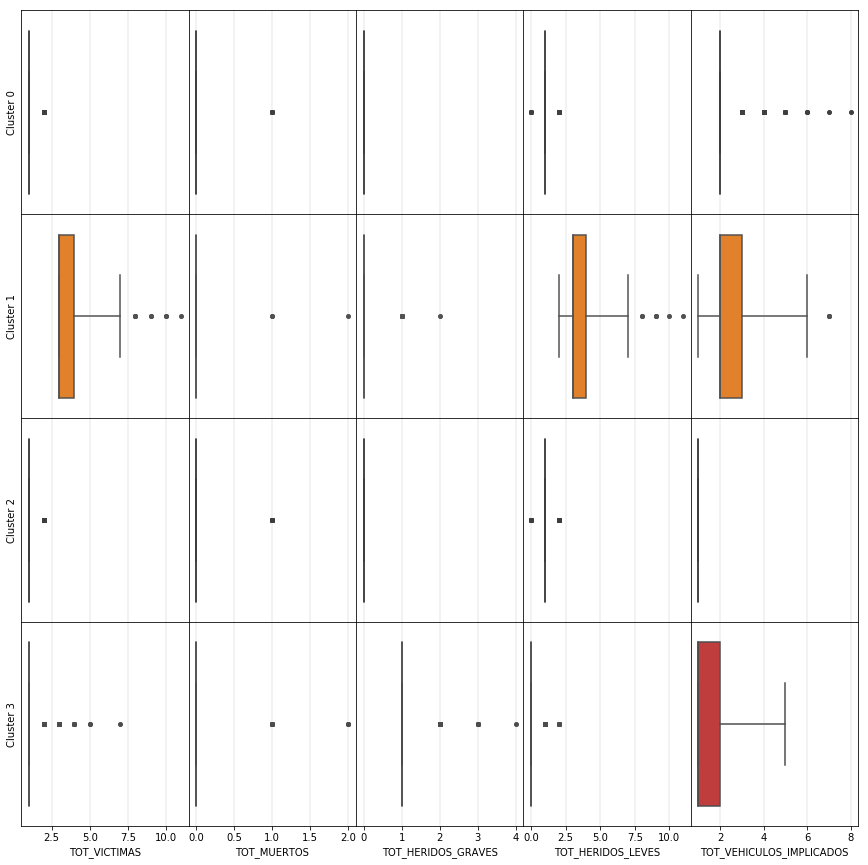

In [23]:
# Box Plot
n_var = len(atributos)
fig, axes = plt.subplots(K, n_var, sharey=True, figsize=(15, 15))
fig.subplots_adjust(wspace=0, hspace=0)

colors = sns.color_palette(palette=None, n_colors=K, desat=None)

rango = []
for j in range(n_var):
    d=dataC[atributos[j]]
    rango.append([d.min(), d.max()])

for i in range(K):
    dat_filt = dataC.loc[dataC['cluster'] == i]
    for j in range(n_var):
        ax  = sns.boxplot(x=dat_filt[atributos[j]],
                         color=colors[i],
                         flierprops={
                             'marker': 'o',
                             'markersize': 4
                         },
                         ax=axes[i, j], whis=3,showfliers=True)

        if (i == K - 1):
            axes[i, j].set_xlabel(atributos[j])
        else:
            axes[i, j].set_xlabel("")

        if (j == 0):
            axes[i, j].set_ylabel("Cluster " + str(i))
        else:
            axes[i, j].set_ylabel("")

        axes[i, j].set_yticks([])
        axes[i, j].grid(axis='x',
                        linestyle='-',
                        linewidth='0.2',
                        color='gray')
        axes[i, j].grid(axis='y', b=False)

        ax.set_xlim(rango[j][0] - 0.05 * (rango[j][1] - rango[j][0]),
                    rango[j][1] + 0.05 * (rango[j][1] - rango[j][0]))

### DBSCAN

Ahora utilizaremos el algoritmo DBSCAN para formar los clústers

In [24]:
# Elección de un umbral de distancia por encima del cual no se mezclarán más clústers
#E=[0.1,0.15,0.2,0.25,0.3,0.35]
E=[0.1,0.11,0.12,0.13,0.14,0.15]
# Con 0.35 en adelante ya hace un sólo clúster
K=[]
silhouette=[]
calinski=[]
for e in E:
    results = DBSCAN(eps=e, min_samples=50, n_jobs=4).fit(data_norm)
    sil, cal = measures_silhoutte_calinski(data_norm, results.labels_)
    silhouette.append(sil)
    calinski.append(cal)
    K.append(max(results.labels_)+1) # La etiqueta -1 corresponde a un clúster de muestras que el algoritmo considera ruidosas, luego lo desecharemos

In [25]:
print(silhouette)
print(calinski)
print(K)

[0.8901906168372793, 0.8901906168372794, 0.8901906168372794, 0.8901906168372794, 0.6051491509258364, 0.5441450024546648]
[1217.8954014285787, 1217.8954014285787, 1217.8954014285787, 1217.8954014285787, 1111.9725791280623, 1071.1345581237717]
[10, 10, 10, 10, 6, 2]


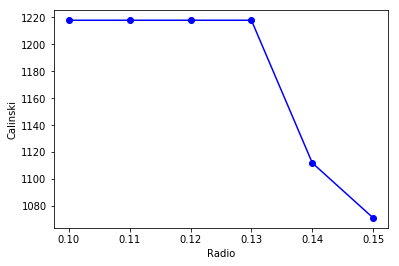

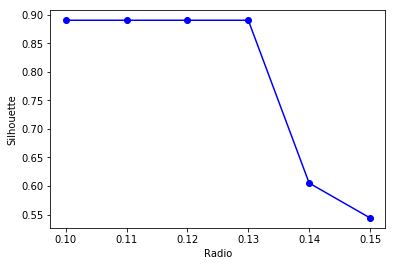

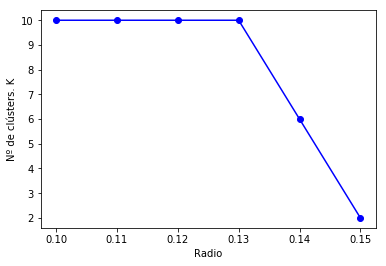

In [26]:
plt.plot(E,calinski, 'bo-')
plt.ylabel('Calinski')
plt.xlabel('Radio')
plt.show()
plt.plot(E,silhouette,'bo-')
plt.ylabel('Silhouette')
plt.xlabel('Radio')
plt.show()
plt.plot(E,K,'bo-')
plt.ylabel('Nº de clústers. K')
plt.xlabel('Radio')
plt.show()

Elegimos epsilon=0.15

In [27]:
E=0.15
results = DBSCAN(eps=E, min_samples=50, n_jobs=4).fit(data_norm)
labels=results.labels_

Calculamos los centroides a mano

In [28]:
dataC=data.copy()
dataC['cluster']=labels
dataC

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,cluster
0,3,0,3,0,2,-1
10,1,0,0,1,1,0
24,1,0,1,0,1,1
29,1,0,0,1,1,0
34,1,0,0,1,1,0
...,...,...,...,...,...,...
89490,1,0,0,1,1,0
89494,1,0,0,1,2,0
89495,3,0,0,3,2,0
89499,1,0,1,0,1,1


In [29]:
Counter(labels)

Counter({-1: 124, 0: 6074, 1: 473})

In [30]:
# Eliminamos los 183 ejemplos que el algoritmo considera ruidosos
dataC.drop(dataC[dataC['cluster']==-1].index,inplace=True)
dataC

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,cluster
10,1,0,0,1,1,0
24,1,0,1,0,1,1
29,1,0,0,1,1,0
34,1,0,0,1,1,0
49,2,0,0,2,2,0
...,...,...,...,...,...,...
89490,1,0,0,1,1,0
89494,1,0,0,1,2,0
89495,3,0,0,3,2,0
89499,1,0,1,0,1,1


In [31]:
centroids = dataC.groupby('cluster').mean()
centroids

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS
cluster,,,,,
0,1.356437,0.0,0.0,1.356437,1.761113
1,1.179704,0.0,1.0,0.179704,1.498943


In [32]:
centroids=centroids.values
centroids

array([[1.35643727, 0.        , 0.        , 1.35643727, 1.76111294],
       [1.17970402, 0.        , 1.        , 0.17970402, 1.49894292]])

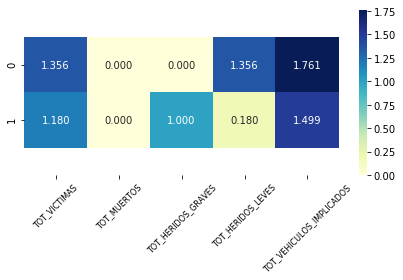

In [33]:
visualize_centroids(centroids, np.array(data), atributos, denormCentroids=False)

/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


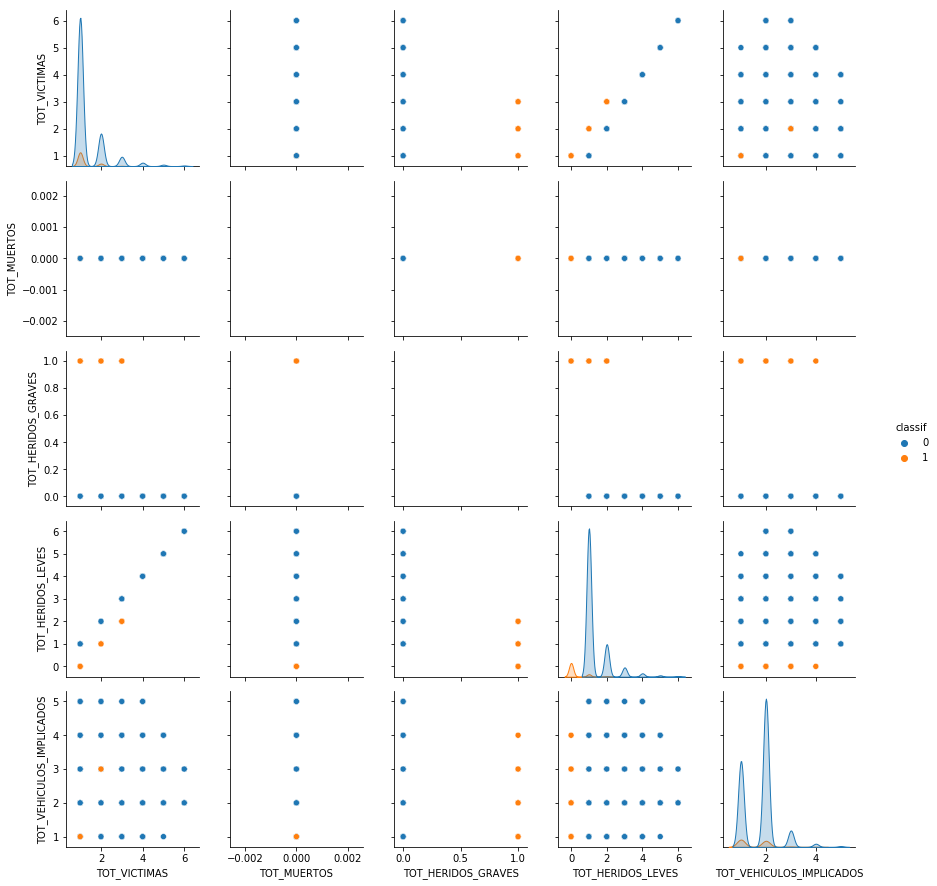

In [34]:
labels=[l for l in labels if l != -1]
pairplot(dataC,atributos,labels)

In [35]:
K=max(labels)+1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0


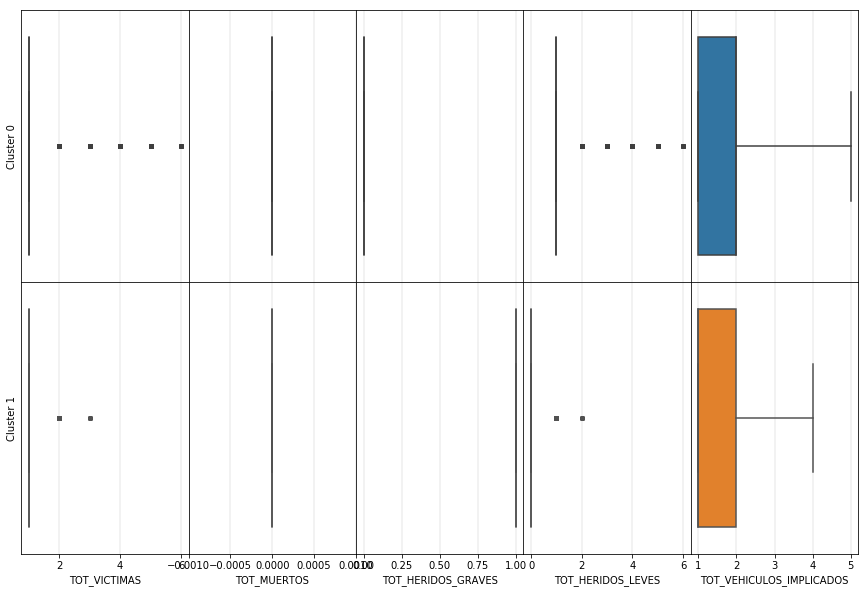

In [38]:
# Box Plot
n_var = len(atributos)
fig, axes = plt.subplots(K, n_var, sharey=True, figsize=(15, 10))
fig.subplots_adjust(wspace=0, hspace=0)

colors = sns.color_palette(palette=None, n_colors=K, desat=None)

rango = []
for j in range(n_var):
    d=dataC[atributos[j]]
    rango.append([d.min(), d.max()])

for i in range(K):
    dat_filt = dataC.loc[dataC['cluster'] == i]
    for j in range(n_var):
        ax  = sns.boxplot(x=dat_filt[atributos[j]],
                         color=colors[i],
                         flierprops={
                             'marker': 'o',
                             'markersize': 4
                         },
                         ax=axes[i, j], whis=3,showfliers=True)

        if (i == K - 1):
            axes[i, j].set_xlabel(atributos[j])
        else:
            axes[i, j].set_xlabel("")

        if (j == 0):
            axes[i, j].set_ylabel("Cluster " + str(i))
        else:
            axes[i, j].set_ylabel("")

        axes[i, j].set_yticks([])
        axes[i, j].grid(axis='x',
                        linestyle='-',
                        linewidth='0.2',
                        color='gray')
        axes[i, j].grid(axis='y', b=False)

        ax.set_xlim(rango[j][0] - 0.05 * (rango[j][1] - rango[j][0]),
                    rango[j][1] + 0.05 * (rango[j][1] - rango[j][0]))

In [37]:
print(sum(data.TOT_MUERTOS))
print(sum(data.TOT_HERIDOS_GRAVES))

47
595
